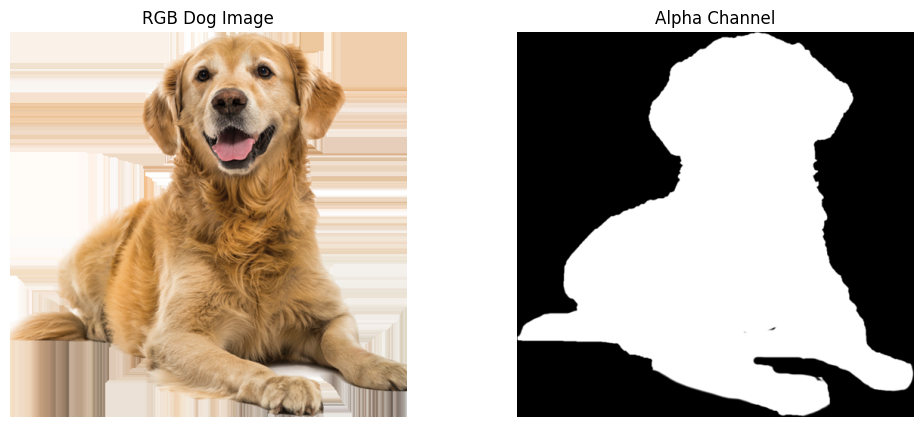

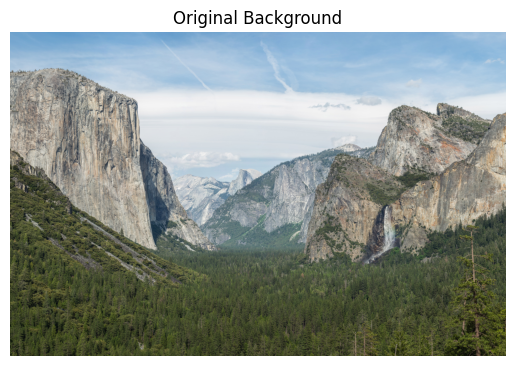

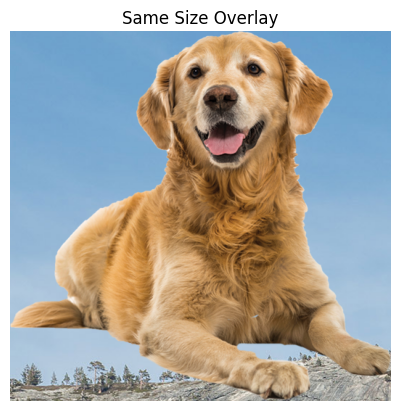

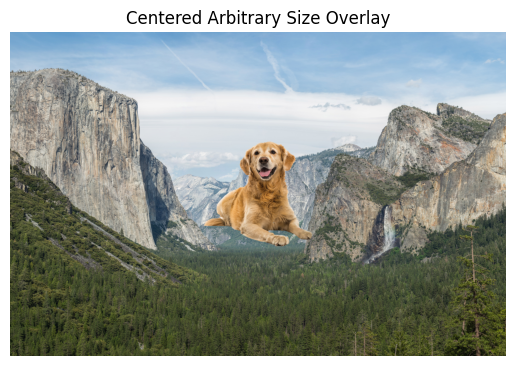

Blur circle (mm): 0.344
Effective sensor width (mm): 35.000
Pixels per mm: 171.4
Blur circle (pixels): 59.0
Sigma (pixels): 29.5
Calculated sigma for bokeh effect: 29.51 pixels


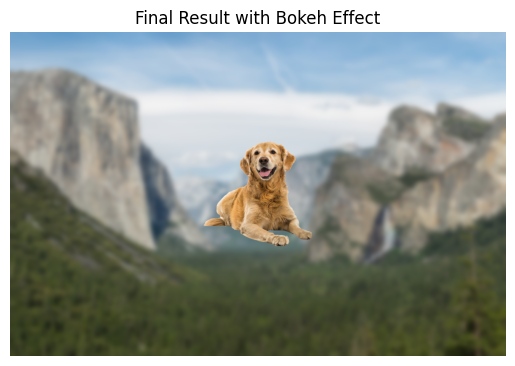

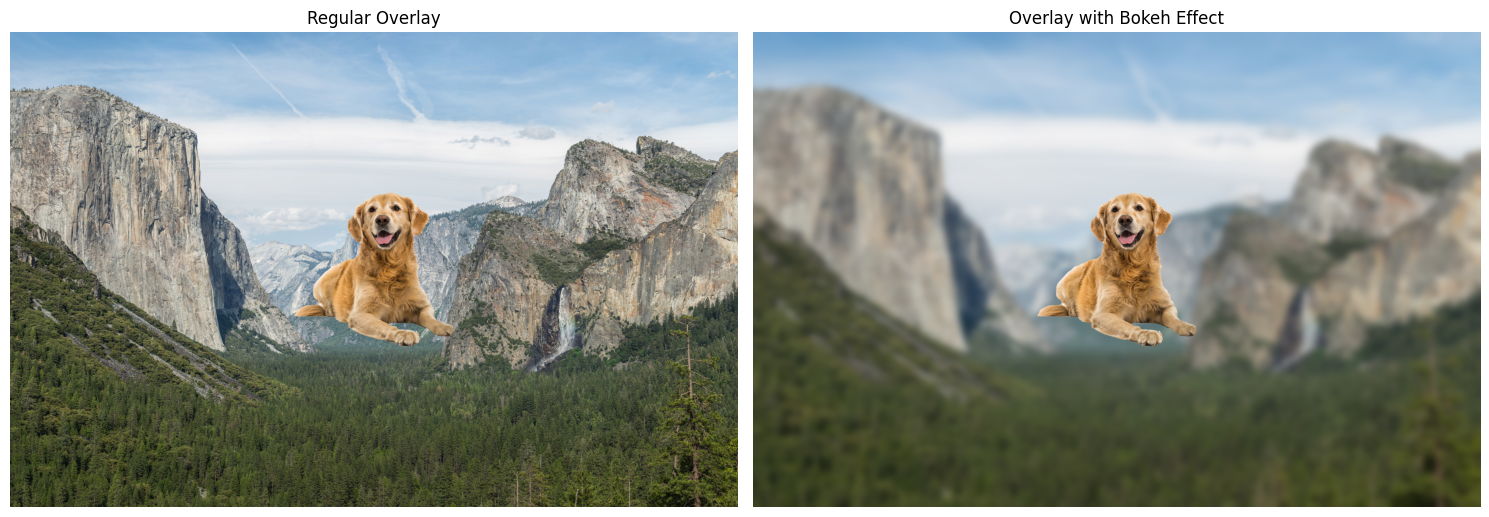

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter

def load_images():
    # Load dog image with alpha channel
    dog_img = Image.open('OPTI536_Homework_1_Images/dog.png')
    # Convert to numpy array and separate alpha
    dog_array = np.array(dog_img)
    rgb_dog = dog_array[:,:,:3]
    alpha = dog_array[:,:,3]
    
    # Load background
    bg_img = Image.open('OPTI536_Homework_1_Images/yosemite.jpg')
    bg_array = np.array(bg_img)
    
    return rgb_dog, alpha, bg_array

def plot_dog_and_alpha(rgb_dog, alpha):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    plt.imshow(rgb_dog)
    plt.title('RGB Dog Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(alpha, cmap='gray')
    plt.title('Alpha Channel')
    plt.axis('off')
    
    plt.show()

def overlay_same_size(rgb_dog, alpha, background):
    # Crop background to dog size
    h, w = rgb_dog.shape[:2]
    bg_cropped = background[:h, :w]
    
    # Create mask
    alpha_3d = alpha[:,:,np.newaxis] / 255.0
    
    # Blend images
    blended = alpha_3d * rgb_dog + (1 - alpha_3d) * bg_cropped
    
    return blended.astype(np.uint8)

def overlay_arbitrary_size(rgb_dog, alpha, background, scale=2.5):
    # Resize dog and alpha
    h, w = rgb_dog.shape[:2]
    new_h, new_w = int(h * scale), int(w * scale)
    
    resized_dog = np.array(Image.fromarray(rgb_dog).resize((new_w, new_h)))
    resized_alpha = np.array(Image.fromarray(alpha).resize((new_w, new_h)))
    
    # Calculate center position
    bg_h, bg_w = background.shape[:2]
    y_start = bg_h//2 - new_h//2
    x_start = bg_w//2 - new_w//2
    
    # Create output image
    result = background.copy()
    
    # Overlay
    alpha_3d = resized_alpha[:,:,np.newaxis] / 255.0
    result[y_start:y_start+new_h, x_start:x_start+new_w] = (
        alpha_3d * resized_dog + 
        (1 - alpha_3d) * result[y_start:y_start+new_h, x_start:x_start+new_w]
    )
    
    return result.astype(np.uint8)

def calculate_blur_radius(background, crop_factor=1.0):
    """
    Calculate blur radius with all calculations in millimeters
    
    Args:
        background: Background image array
        crop_factor: Factor representing how much of the sensor width the image represents
                    1.0 means full sensor width, 0.5 means half width (cropped), etc.
    """
    # All measurements in mm
    f = 50  # focal length in mm
    D = 10  # aperture diameter in mm
    d1 = 1500  # dog distance (1.5m = 1500mm)
    d2 = 1000000  # background distance (1000m = 1000000mm)
    sensor_width = 35  # sensor width in mm
    
    # Calculate image distances using thin lens equation
    i1 = (f * d1) / (d1 - f)  # dog image distance in mm
    i2 = (f * d2) / (d2 - f)  # background image distance in mm
    
    # Calculate blur circle in mm
    b = D * abs(i2 - i1) / i2
    
    # Consider actual sensor coverage
    effective_sensor_width = sensor_width * crop_factor
    
    # Convert blur circle to pixels
    image_width = background.shape[1]  # get actual image width in pixels
    pixels_per_mm = image_width / effective_sensor_width
    b_pixels = b * pixels_per_mm
    
    # Set sigma according to b = 2σ
    # σ  = b/2
    sigma = b_pixels / 2
    
    print(f"Blur circle (mm): {b:.3f}")
    print(f"Effective sensor width (mm): {effective_sensor_width:.3f}")
    print(f"Pixels per mm: {pixels_per_mm:.1f}")
    print(f"Blur circle (pixels): {b_pixels:.1f}")
    print(f"Sigma (pixels): {sigma:.1f}")
    
    return sigma

def apply_bokeh(background, sigma):
    # Apply Gaussian blur
    blurred = gaussian_filter(background, sigma=(sigma, sigma, 0))
    return blurred.astype(np.uint8)

def plot_comparison(blended_arbitrary, final_result):
    plt.figure(figsize=(15, 6))
    
    plt.subplot(121)
    plt.imshow(blended_arbitrary)
    plt.title('Regular Overlay')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(final_result)
    plt.title('Overlay with Bokeh Effect')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load images
    rgb_dog, alpha, background = load_images()
    
    # Plot dog and alpha
    plot_dog_and_alpha(rgb_dog, alpha)
    
    # Plot background
    plt.figure()
    plt.imshow(background)
    plt.title('Original Background')
    plt.axis('off')
    plt.show()
    
    # Same size overlay
    blended_same_size = overlay_same_size(rgb_dog, alpha, background)
    plt.figure()
    plt.imshow(blended_same_size)
    plt.title('Same Size Overlay')
    plt.axis('off')
    plt.show()
    
    # Arbitrary size overlay
    blended_arbitrary = overlay_arbitrary_size(rgb_dog, alpha, background)
    plt.figure()
    plt.imshow(blended_arbitrary)
    plt.title('Centered Arbitrary Size Overlay')
    plt.axis('off')
    plt.show()
    
    # Calculate and apply bokeh effect
    sigma = calculate_blur_radius(background)
    # sigma = 50
    print(f"Calculated sigma for bokeh effect: {sigma:.2f} pixels")
    
    blurred_bg = apply_bokeh(background, sigma)
    final_result = overlay_arbitrary_size(rgb_dog, alpha, blurred_bg)
    
    plt.figure()
    plt.imshow(final_result)
    plt.title('Final Result with Bokeh Effect')
    plt.axis('off')
    plt.show()

        # Plot comparison
    plot_comparison(blended_arbitrary, final_result)

Scale (pixels/mm on sensor): 171.43
Dog width on sensor (mm): 20.000
Dog width in image (pixels): 3428.6
Original size: 525x510
New size: 3428x3330
Blur circle (mm): 0.344
Effective sensor width (mm): 35.000
Pixels per mm: 171.4
Blur circle (pixels): 59.0
Sigma (pixels): 29.5

Using sigma = 29.51 pixels for blur
Scale (pixels/mm on sensor): 171.43
Dog width on sensor (mm): 20.000
Dog width in image (pixels): 3428.6
Original size: 525x510
New size: 3428x3330


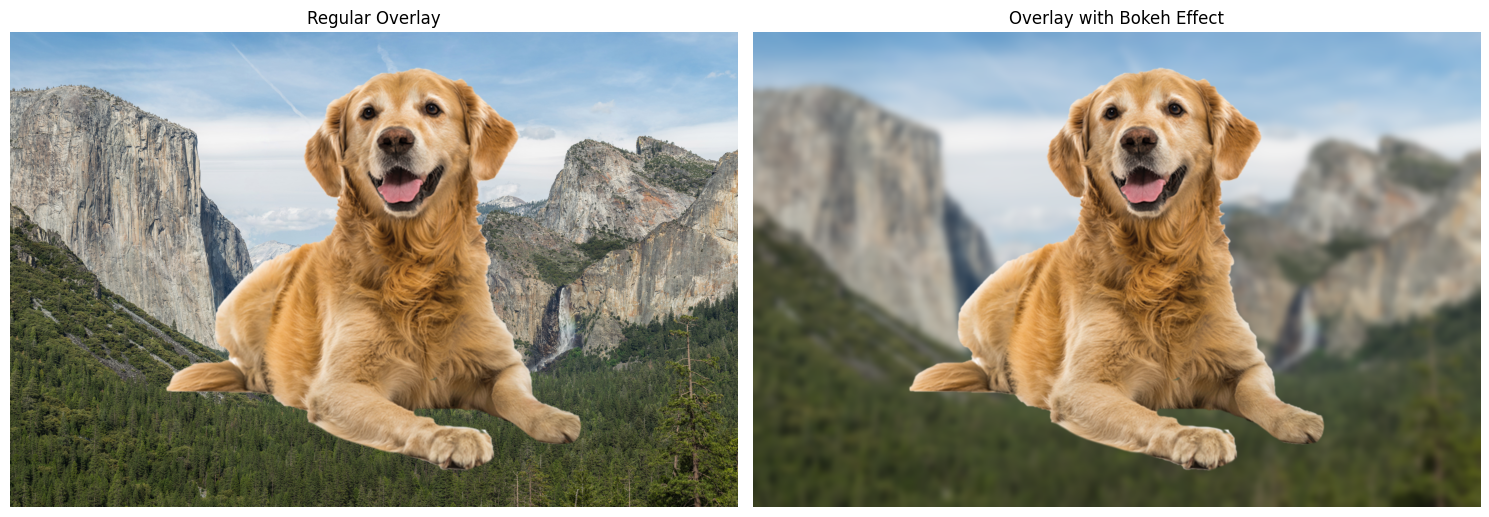

In [13]:
# to do calculate the aspect ratio of dog follow the real world physical distance of vs sensor size assuming no croping perfomed by the sensor
def calculate_dog_size_pixels(background_width_px, sensor_width_mm, dog_distance_mm, dog_real_width_mm):
    """Calculate dog width in pixels based on camera parameters and physical measurements"""
    # Calculate scale (pixels per mm on sensor)
    pixels_per_mm = background_width_px / sensor_width_mm
    
    # Using similar triangles:
    # dog_real_width / dog_distance = dog_sensor_width / focal_length
    f = 50  # focal length in mm
    dog_sensor_width_mm = (dog_real_width_mm * f) / dog_distance_mm
    
    # Convert to pixels
    dog_width_px = dog_sensor_width_mm * pixels_per_mm
    
    print(f"Scale (pixels/mm on sensor): {pixels_per_mm:.2f}")
    print(f"Dog width on sensor (mm): {dog_sensor_width_mm:.3f}")
    print(f"Dog width in image (pixels): {dog_width_px:.1f}")
    
    return dog_width_px

def overlay_physical_size(rgb_dog, alpha, background, dog_real_width_mm=600):
    """
    Overlay dog image on background with physically correct scaling
    
    Args:
        rgb_dog: RGB image of dog
        alpha: Alpha channel of dog image
        background: Background image
        dog_real_width_mm: Real width of dog in mm (default 600mm = 60cm)
    """
    # Camera parameters
    sensor_width_mm = 35  # full-frame sensor width
    dog_distance_mm = 1500  # 1.5m to dog
    
    # Calculate target dog width in pixels
    target_width = calculate_dog_size_pixels(
        background_width_px=background.shape[1],
        sensor_width_mm=sensor_width_mm,
        dog_distance_mm=dog_distance_mm,
        dog_real_width_mm=dog_real_width_mm
    )
    
    # Calculate scaling factor
    current_width = rgb_dog.shape[1]
    scale_factor = target_width / current_width
    
    # Calculate new dimensions
    new_width = int(rgb_dog.shape[1] * scale_factor)
    new_height = int(rgb_dog.shape[0] * scale_factor)
    
    print(f"Original size: {rgb_dog.shape[1]}x{rgb_dog.shape[0]}")
    print(f"New size: {new_width}x{new_height}")
    
    # Resize dog and alpha
    resized_dog = np.array(Image.fromarray(rgb_dog).resize((new_width, new_height)))
    resized_alpha = np.array(Image.fromarray(alpha).resize((new_width, new_height)))
    
    # Calculate center position
    bg_h, bg_w = background.shape[:2]
    y_start = bg_h//2 - new_height//2
    x_start = bg_w//2 - new_width//2
    
    # Create output image
    result = background.copy()
    
    # Overlay
    alpha_3d = resized_alpha[:,:,np.newaxis] / 255.0
    result[y_start:y_start+new_height, x_start:x_start+new_width] = (
        alpha_3d * resized_dog + 
        (1 - alpha_3d) * result[y_start:y_start+new_height, x_start:x_start+new_width]
    )
    
    return result.astype(np.uint8)

# Main execution
if __name__ == "__main__":
    # Load images
    rgb_dog, alpha, background = load_images()
    
    # Create blended overlay with physical scaling
    blended_physical = overlay_physical_size(rgb_dog, alpha, background, dog_real_width_mm=600)
    
    # Calculate and apply bokeh effect
    sigma = calculate_blur_radius(background, crop_factor=1.0)
    print(f"\nUsing sigma = {sigma:.2f} pixels for blur")
    
    blurred_bg = apply_bokeh(background, sigma)
    final_result = overlay_physical_size(rgb_dog, alpha, blurred_bg, dog_real_width_mm=600)
    
    # Plot comparison
    plot_comparison(blended_physical, final_result)


In [ ]:
# overlay two images with other cool motion blur 
# implement the gauss with conv2 and check it with the lib